# Polynomial logistic regression -ipo dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm            # sm.GLM

In [3]:
data = pd.read_csv('ipo.csv')

In [4]:
data.shape

(482, 4)

In [5]:
data[:5]

,funding,fvalue,shares,buyout
0,0,1200000,3000000,0
1,0,1454000,1454000,1
2,0,1500000,300000,0
3,0,1530000,510000,0
4,0,2000000,800000,0


In [8]:
# funding is target, fvalue is feature

In [9]:
# number of rows by category -response

In [10]:
pd.value_counts(data.funding)

0    270
1    212
Name: funding, dtype: int64

In [ ]:
# histogram with pandas

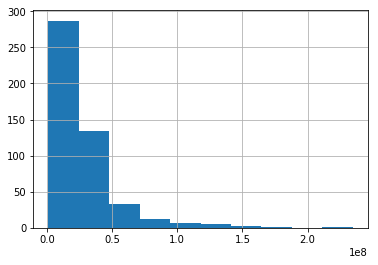

In [11]:
data.fvalue.hist();

In [12]:
# histogram with matplotlib

In [13]:
# convert dataframe to numpy array

In [14]:
array = data.values

In [15]:
array[:5]

array([[      0, 1200000, 3000000,       0],
       [      0, 1454000, 1454000,       1],
       [      0, 1500000,  300000,       0],
       [      0, 1530000,  510000,       0],
       [      0, 2000000,  800000,       0]], dtype=int64)

In [16]:
funding = array[:,0]       # target

In [17]:
fvalue  = array[:,1]       # feature

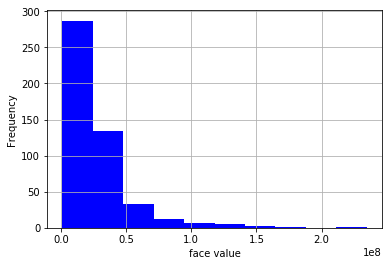

In [18]:
plt.hist(fvalue,color = "b")
plt.xlabel("face value")
plt.ylabel("Frequency")
plt.grid()

In [ ]:
# face value right skewed (long right tail)

In [ ]:
# log transformation

In [19]:
logfvalue = np.log(data["fvalue"])

In [20]:
type(logfvalue)

pandas.core.series.Series

In [21]:
# pandas Series, we can use pandas hist function

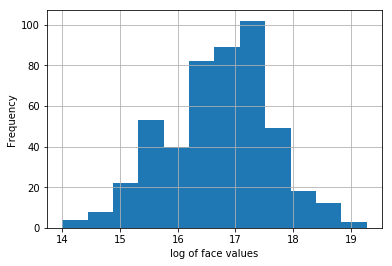

In [23]:
plt.hist(logfvalue,bins=12)
plt.xlabel("log of face values") 
plt.ylabel("Frequency") 
plt.grid()

In [24]:
# predictor is not skewed

### sm.GLM

In [ ]:
# log of facevalue as numpy array, (needed for sm.add_constant)

In [25]:
log_fvalues = np.log(array[:,1]) 

In [26]:
x_log_fvalues = sm.add_constant(log_fvalues)

In [126]:
model1 = sm.GLM(funding,x_log_fvalues,family=sm.families.Binomial()).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  482
Model:                            GLM   Df Residuals:                      480
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -321.57
Date:                Fri, 04 Oct 2019   Deviance:                       643.13
Time:                        13:03:03   Pearson chi2:                     479.
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.6722      1.804     -4.253      0.000     -11.208      -4.136
x1             0.4441      0.108      4.130      0.000       0.233       0.655
==============================================================================
"""

In [127]:
# probability of funding increases with facevalue

### how good the model fits the data?

In [128]:
# deviance

In [129]:
model1.null_deviance

661.1976876247234

In [130]:
model1.deviance

643.1320561968481

In [131]:
# not much smaller than null_deviance -not good model

In [132]:
model1.aic

647.1320561968481

In [133]:
# AIC will be used to compare with other models

In [134]:
# predicted probability of funding when face value is 1200000 (row 1)

In [135]:
data[:1]

,funding,fvalue,shares,buyout
0,0,1200000,3000000,0


In [136]:
model1.params

array([-7.67217431,  0.44407012])

In [137]:
b0 = model1.params[0]
b1 = model1.params[1] 

In [138]:
# predict probability by hand

In [139]:
yhat1 = 1/(1+np.exp(-b0-b1*np.log(1200000)))
yhat1

0.18905605986140714

In [140]:
# predict probability using the model

In [141]:
model1.fittedvalues[:1]

array([0.18905606])

In [142]:
# plot

In [143]:
xaxis = np.arange(14,19.5,1)
yaxis = model1.predict(sm.add_constant(xaxis))

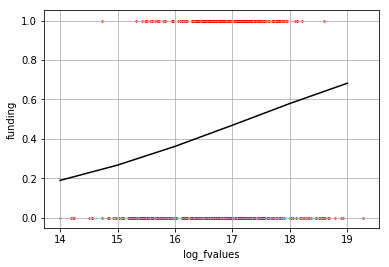

In [144]:
plt.plot(xaxis,yaxis,c='k')
plt.scatter(log_fvalues,funding,s=2,c='r')
plt.xlabel('log_fvalues')
plt.ylabel('funding')
plt.grid()

In [145]:
# fitted curve not close to data points

### non parametric fitting -lowess

In [39]:
lowess = sm.nonparametric.lowess
loess = lowess(funding,log_fvalues)

In [40]:
loess_x = loess[:,0]
loess_y = loess[:,1]

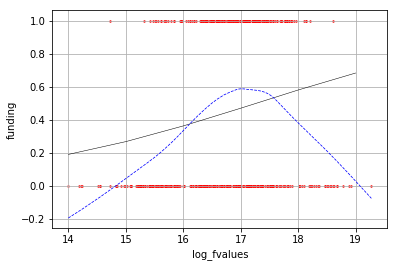

In [41]:
plt.plot(xaxis,yaxis,c='k',linewidth=0.50)
plt.scatter(log_fvalues,funding,s=2,c='r')

# plot nonparametric curve
plt.plot(log_fvalues,loess_y,'--',c='b',linewidth=0.75)

plt.xlabel('log_fvalues')
plt.ylabel('funding')
plt.grid()

In [ ]:
# d) second order logistic model

In [81]:
# square predictor values

In [42]:
log_fvalues_2 = np.power(log_fvalues,2)
log_fvalues_2[:5]

array([195.93930391, 201.35124526, 202.2361489 , 202.7997664 ,
       210.50114937])

In [58]:
input_fvalues_2 = np.concatenate([[log_fvalues,log_fvalues_2]]).T
input_fvalues_2[:5]

array([[ 13.99783211, 195.93930391],
       [ 14.18982894, 201.35124526],
       [ 14.22097567, 202.2361489 ],
       [ 14.24077829, 202.7997664 ],
       [ 14.50865774, 210.50114937]])

In [59]:
x_2 = sm.add_constant(input_fvalues_2)
x_2[:5]

array([[  1.        ,  13.99783211, 195.93930391],
       [  1.        ,  14.18982894, 201.35124526],
       [  1.        ,  14.22097567, 202.2361489 ],
       [  1.        ,  14.24077829, 202.7997664 ],
       [  1.        ,  14.50865774, 210.50114937]])

In [60]:
model2 = sm.GLM(funding,x_2,family=sm.families.Binomial()).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  482
Model:                            GLM   Df Residuals:                      479
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -294.13
Date:                Fri, 04 Oct 2019   Deviance:                       588.27
Time:                        12:15:05   Pearson chi2:                     514.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -249.4382     39.658     -6.290      0.000    -327.167    -171.710
x1            29.3414      4.722      6.214      0.000      20.087      38.596
x2            -0.8615      0.140     -6.136      0.000      -1.137      -0.586
==============================================================================
"""

In [90]:
# deviance

In [61]:
model2.null_deviance

661.1976876247234

In [62]:
model2.deviance

588.2652363617015

In [63]:
# much smaller than null deviance -good model

In [64]:
model2.aic

594.2652363617015

In [65]:
# smaller than first-order logistic model

### plot 2nd order logistic fitted curve

In [66]:
xaxis = np.arange(14,19.5,0.1)   # increment is 0.10

In [67]:
x2 = np.power(xaxis,2)

In [68]:
x = np.concatenate([[xaxis,x2]]).T
x[:5]

array([[ 14.  , 196.  ],
       [ 14.1 , 198.81],
       [ 14.2 , 201.64],
       [ 14.3 , 204.49],
       [ 14.4 , 207.36]])

In [69]:
yhat = model2.predict(sm.add_constant(x))

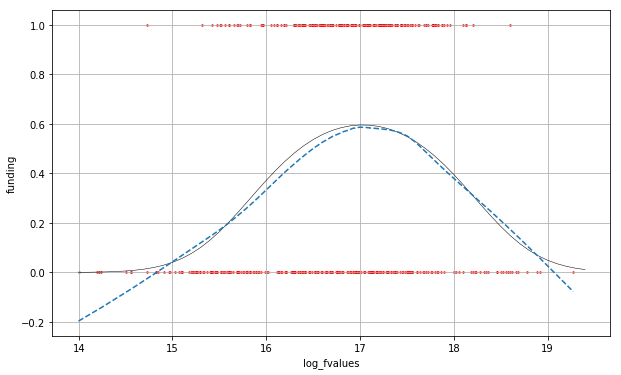

In [70]:
plt.figure(figsize=(10,6))
plt.plot(xaxis,yhat,c='k',linewidth=0.5)     # fitted quadratic curve
plt.scatter(log_fvalues,funding,s=2,c='r')
plt.xlabel('log_fvalues')
plt.ylabel('funding')
plt.grid()
plt.plot(log_fvalues,loess_y,'--');

In [100]:
# e) third order

In [71]:
log_fvalues_3 = np.power(log_fvalues,3)

In [72]:
input_fvalues_3 = np.concatenate([[log_fvalues,log_fvalues_2,log_fvalues_3]]).T
input_fvalues_3[:5]

array([[  13.99783211,  195.93930391, 2742.72548086],
       [  14.18982894,  201.35124526, 2857.13972656],
       [  14.22097567,  202.2361489 , 2875.99535224],
       [  14.24077829,  202.7997664 , 2888.02651126],
       [  14.50865774,  210.50114937, 3054.08912983]])

In [73]:
x3 = sm.add_constant(input_fvalues_3)

In [74]:
model3 = sm.GLM(funding,x3,family=sm.families.Binomial()).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  482
Model:                            GLM   Df Residuals:                      478
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -293.26
Date:                Fri, 04 Oct 2019   Deviance:                       586.52
Time:                        12:21:43   Pearson chi2:                     479.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        558.9422    581.237      0.962      0.336    -580.261    1698.145
x1          -115.4416    104.402     -1.106      0.269    -320.066      89.183
x2             7.7670      6.243      1.244      0.213      -4.469      20.003
x3            -0.1711      0.124     -1.377      0.169      -0.415       0.072
==============================================================================
"""

In [103]:
# deviance

In [75]:
model3.null_deviance

661.1976876247234

In [76]:
model3.deviance

586.516216123181

In [ ]:
# slightly smaller than deviance of second-order model

In [77]:
model3.aic

594.516216123181

In [78]:
# not smaller than AIC of second-order model

In [ ]:
# 2nd order model is AIC-better than 3rd order model

### k-fold cross-validation -sklearn

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [80]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 17)

In [81]:
log_fvalues.shape

(482,)

In [82]:
log_fvalues.reshape(-1,1).shape

(482, 1)

In [83]:
# simple logistic regression

In [84]:
np.random.seed(1)

In [85]:
model_1 = LogisticRegression(solver='lbfgs')

In [86]:
results_1 = cross_val_score(model_1,log_fvalues.reshape(-1,1),funding,cv=kfold)

In [87]:
# accuracy rate

In [88]:
arate1 = results_1.mean()
arate1

0.5501073883161511

In [89]:
# loop up to degree 6

In [ ]:
n = 

In [90]:
model = LogisticRegression(solver='lbfgs')

In [91]:
arate_kfold = [arate1]

In [92]:
for i in range(2,7):
    form = PolynomialFeatures(degree = i)
    x = form.fit_transform(log_fvalues.reshape(-1,1))
    results = cross_val_score(model,x,funding,cv = kfold)
    arate_kfold.append(results.mean())

In [93]:
arate_kfold

[0.5501073883161511,
 0.5438788659793814,
 0.5417955326460482,
 0.5620919243986254,
 0.5498926116838487,
 0.5869201030927835]

In [124]:
np.argmin(arate_kfold)

2

In [94]:
# plot

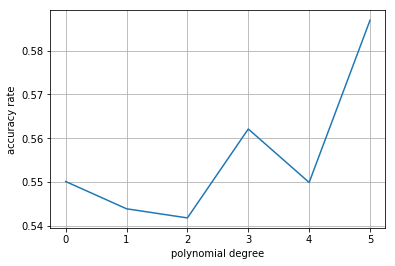

In [125]:
plt.plot(arate_kfold)
plt.xlabel('polynomial degree')
plt.ylabel('accuracy rate')
plt.grid()

In [ ]:
# degree 3 predicts better than degree 2 logistic model